# Programming Assignment 2

## Two changes to be made in PRML library before you begin:
 * Go to prml --> linear --> logistic_regression.py and change astype(np.int) to astype(int) under `classify` function.
 * Go to prml --> linear --> fishers_linear_discriminant.py and change astype(np.int) to astype(int) under `classify` function.


In [51]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    BayesianLogisticRegression,
    LeastSquaresClassifier,
    FishersLinearDiscriminant,
    LogisticRegression,
    Perceptron,
    SoftmaxRegression
)

## Section 1: Binary Classification

In [52]:
def create_data(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=1000).reshape(-1, 2) - 1.5
    x1 = np.random.normal(size=1000).reshape(-1, 2) + 1.5
    if add_outliers:
        x_1 = np.random.normal(size=200).reshape(-1, 2) + np.array([6.5, 9.5])
        return np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(700), np.ones(400)]).astype(int)
    if add_class:
        x2 = np.random.normal(size=1000).reshape(-1, 2) + 3.5
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(500), np.ones(500), 2 + np.zeros(500)]).astype(int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(500), np.ones(500)]).astype(int)


## 1a. Create a dataset using the `create_data` function with `add_class` set to `False` and `add_outliers` set to `False`.
   * Classify the output using Least Squares Classifier, Logistic Regression, Fisher's Linear Discriminant
   * Plot the data points and the decision boundary for all the 3 models
   * Write your observations


# Data Creation with add_class set to False and add_outliers set to False.

In [53]:
X, y = create_data(False,False)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
feature = PolynomialFeature(1)
X_train = feature.transform(X)
X_test = feature.transform(x_test)

# Classifiers

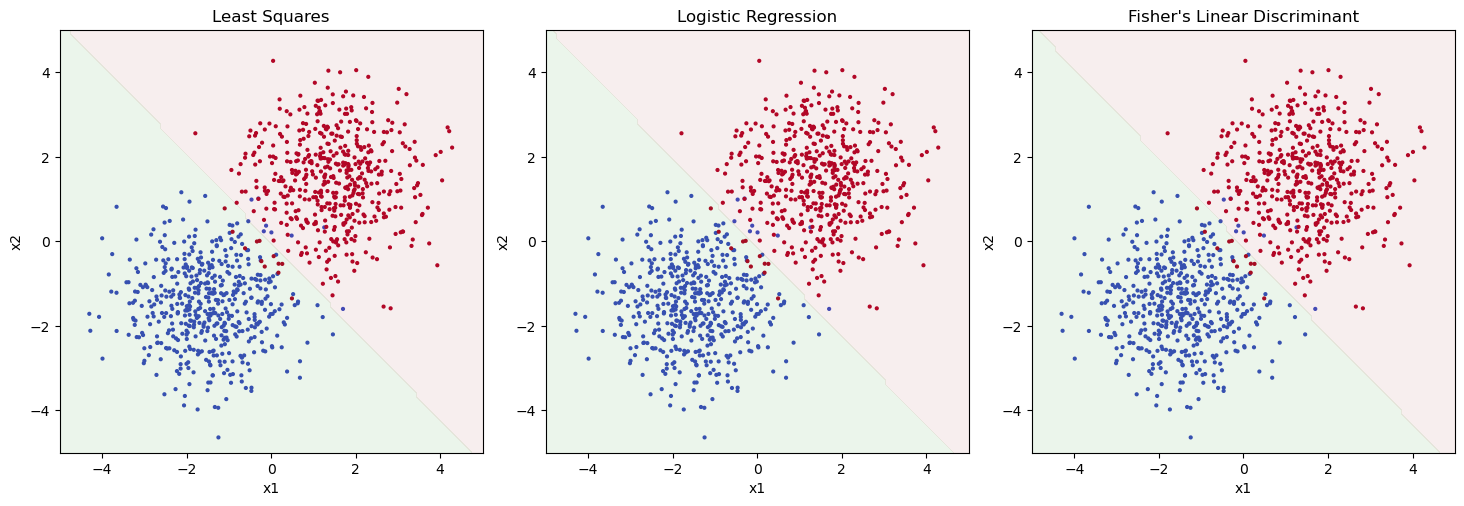

In [54]:
#Least Squares Classifier
model_lsc = LeastSquaresClassifier()
model_lsc.fit(X_train, y)
y_pred_lsc = model_lsc.classify(X_test)

#Logistic Regression
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, y)
y_pred_log_reg = model_log_reg.classify(X_test)

#Fisher's Linear Discriminant
model_fld = FishersLinearDiscriminant()
model_fld.fit(X, y)
y_pred_fld = model_fld.classify(x_test)

# fig, axs = plt.subplots(2, 2)
# fig.subplots_adjust(wspace=0.5, hspace=0.5)

plt.figure(figsize=(18, 9))

#Plot of Least Squares Classifier
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=(y == 1), s=4, cmap='coolwarm')
plt.contourf(x1_test, x2_test, y_pred_lsc.reshape(100, 100), alpha=0.08, levels=np.linspace(0, 1, 3), colors=['green','brown'])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")
plt.xlabel('x1')
plt.ylabel('x2')

#Plot of Logistic Regression
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=(y == 1), s=4, cmap='coolwarm')
plt.contourf(x1_test, x2_test, y_pred_log_reg.reshape(100, 100), alpha=0.08, levels=np.linspace(0, 1, 3), colors=['green','brown'])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.xlabel('x1')
plt.ylabel('x2')

#Plot of Fisher's Linear Discriminant
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=(y == 1), s=4, cmap='coolwarm')
plt.contourf(x1_test, x2_test, y_pred_fld.reshape(100, 100), alpha=0.08, levels=np.linspace(0, 1, 3), colors=['green','brown'])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Fisher's Linear Discriminant")
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplots_adjust(wspace=0.15)
plt.show()

# 1a. Observations

#### The 2-class classification of generated dataset having no outliers is similar for all three classifiers with visually no difference observed.

## 1b. Create a dataset using the `create_data` function with `add_class` set to `False` and `add_outliers` set to `True`.
   * Classify the output using Least Squares Classifier, Logistic Regression, Fisher's Linear Discriminant
   * Plot the data points and the decision boundary for all the 3 models
   * Write your observations

# Data Creation with add_class set to False and add_outliers set to True.

In [55]:
X, y = create_data(True,False)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
feature = PolynomialFeature(1)
X_train = feature.transform(X)
X_test = feature.transform(x_test)

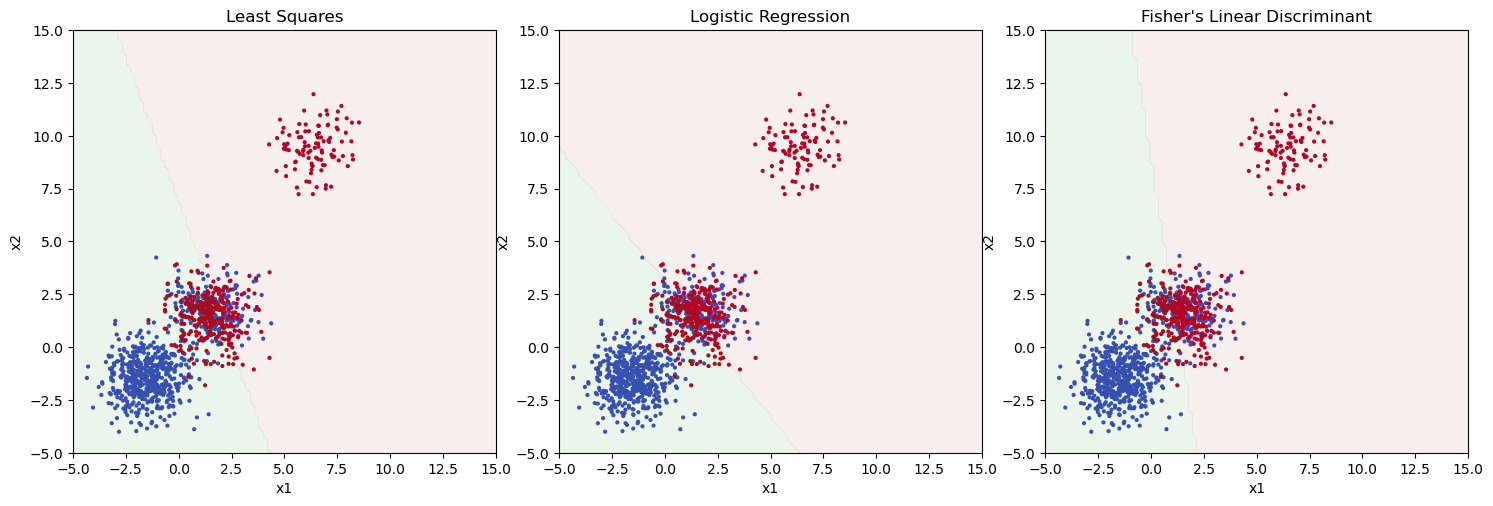

In [56]:
#Least Squares Classifier
model_lsc = LeastSquaresClassifier()
model_lsc.fit(X_train, y)
y_pred_lsc = model_lsc.classify(X_test)

#Logistic Regression
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, y)
y_pred_log_reg = model_log_reg.classify(X_test)

#Fisher's Linear Discriminant
model_fld = FishersLinearDiscriminant()
model_fld.fit(X, y)
y_pred_fld = model_fld.classify(x_test)

# fig, axs = plt.subplots(2, 2)
# fig.subplots_adjust(wspace=0.5, hspace=0.5)

plt.figure(figsize=(18, 9))

#Plot of Least Squares Classifier
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=(y == 1), s=4, cmap='coolwarm')
plt.contourf(x1_test, x2_test, y_pred_lsc.reshape(100, 100), alpha=0.08, levels=np.linspace(0, 1, 3), colors=['green','brown'])
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")
plt.xlabel('x1')
plt.ylabel('x2')

#Plot of Logistic Regression
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=(y == 1), s=4, cmap='coolwarm')
plt.contourf(x1_test, x2_test, y_pred_log_reg.reshape(100, 100), alpha=0.08, levels=np.linspace(0, 1, 3), colors=['green','brown'])
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.xlabel('x1')
plt.ylabel('x2')

#Plot of Fisher's Linear Discriminant
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=(y == 1), s=4, cmap='coolwarm')
plt.contourf(x1_test, x2_test, y_pred_fld.reshape(100, 100), alpha=0.08, levels=np.linspace(0, 1, 3), colors=['green','brown'])
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Fisher's Linear Discriminant")
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplots_adjust(wspace=0.15)
plt.show()

# 1b. Observations

#### Here we see that the additional data points(outliers) produce a considerable class overlap. This makes a significant change in the location of the decision boundaries. Among the three classifiers, least squares classifiers performs slightly worse than the others. The sum-of-squares error function penalizes predictions that are ‘too correct’ in that they lie a long way on the correct side of the decision boundary, showing that least squares is highly sensitive to outliers, unlike logistic regression.

## Section 2: Multi-class Classification

## 2a. Create a dataset using the `create_data` function with `add_class` set to `True` and `add_outliers` set to `False`
   * Classify the output using Least Squares Classifier and Logistic Regression
   * Plot the data points and the decision boundary for above models
   * Write your observations

# Data Creation with add_class set to True and add_outliers set to False

In [57]:
X, y = create_data(False, True)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 10, 100), np.linspace(-5, 10, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
feature = PolynomialFeature(1)
X_train = feature.transform(X)
X_test = feature.transform(x_test)

# Classifiers

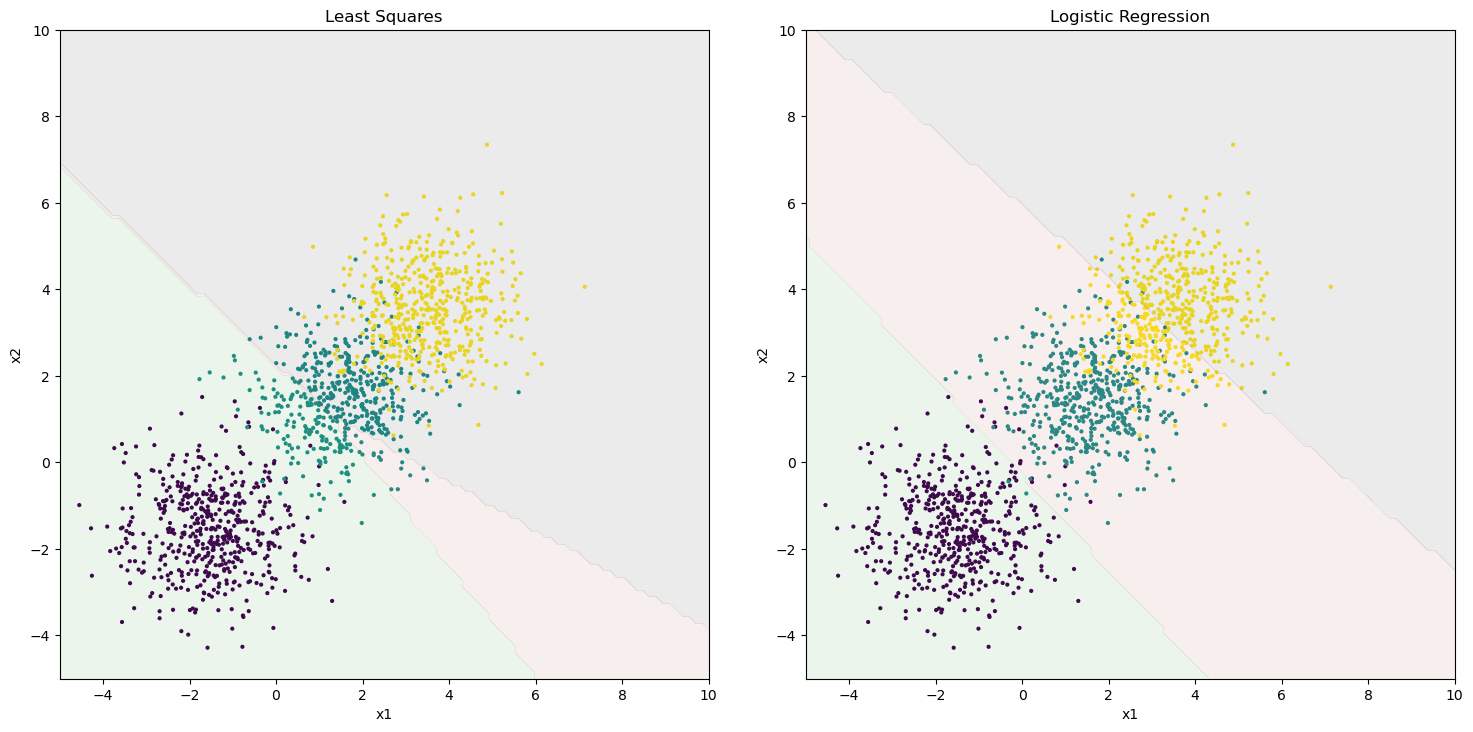

In [58]:
#Least Squares Classifier
model_lsc = LeastSquaresClassifier()
model_lsc.fit(X_train, y)
y_pred_lsc = model_lsc.classify(X_test)

#Logistic Regression
model_log_reg = SoftmaxRegression()
model_log_reg.fit(X_train, y, max_iter=1000, learning_rate=0.01)
y_pred_log_reg = model_log_reg.classify(X_test)

plt.figure(figsize=(18, 9))

#Plot of Least Squares Classifier
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=4, cmap='viridis')
plt.contourf(x1_test, x2_test, y_pred_lsc.reshape(100, 100), alpha=0.08, levels=np.array([0., 0.5, 1.5, 2.]), colors=['green','brown','black'])
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")
plt.xlabel('x1')
plt.ylabel('x2')

#Plot of Logistic Regression
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=4, cmap='viridis')
plt.contourf(x1_test, x2_test, y_pred_log_reg.reshape(100, 100), alpha=0.08, levels=np.array([0., 0.5, 1.5, 2.]), colors=['green','brown','black'])
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplots_adjust(wspace=0.15)
plt.show()

# 2a. Observations

#### On the left is the result of using a least-squares discriminant. We see that the region of input space assigned to the green class is too small and so most of the points from this class are misclassified. It is because least squares' maximum likelihood is under the assumption of a Gaussian conditional distribution, whereas binary target vectors can have a distribution that is far from Gaussian. 
#### On the right is the result of using logistic regression showing a better classification of the training data.

## 2b. Use `abalone.csv`
   * Consider any two columns as x_train
   * Consider `class` column as y_train
   * Classify the output using Least Squares Classifier and Logistic Regression
   * Plot the data points and the decision boundary for above models
   * Write your observations

In [59]:
import pandas as pd
df = pd.read_csv("abalone.csv")
sampled_df = df.sample(n=500)

# x_train = sampled_df[['feature1','feature2']].values
# y_train = sampled_df['target_variable'].values

In [60]:
df['class'].unique()

array([0, 1, 2])

In [65]:
X = df[['length','viscera_weight']].values
y = df['class'].values
x1_test, x2_test = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
feature = PolynomialFeature(1)
X_train = feature.transform(X)
X_test = feature.transform(x_test)

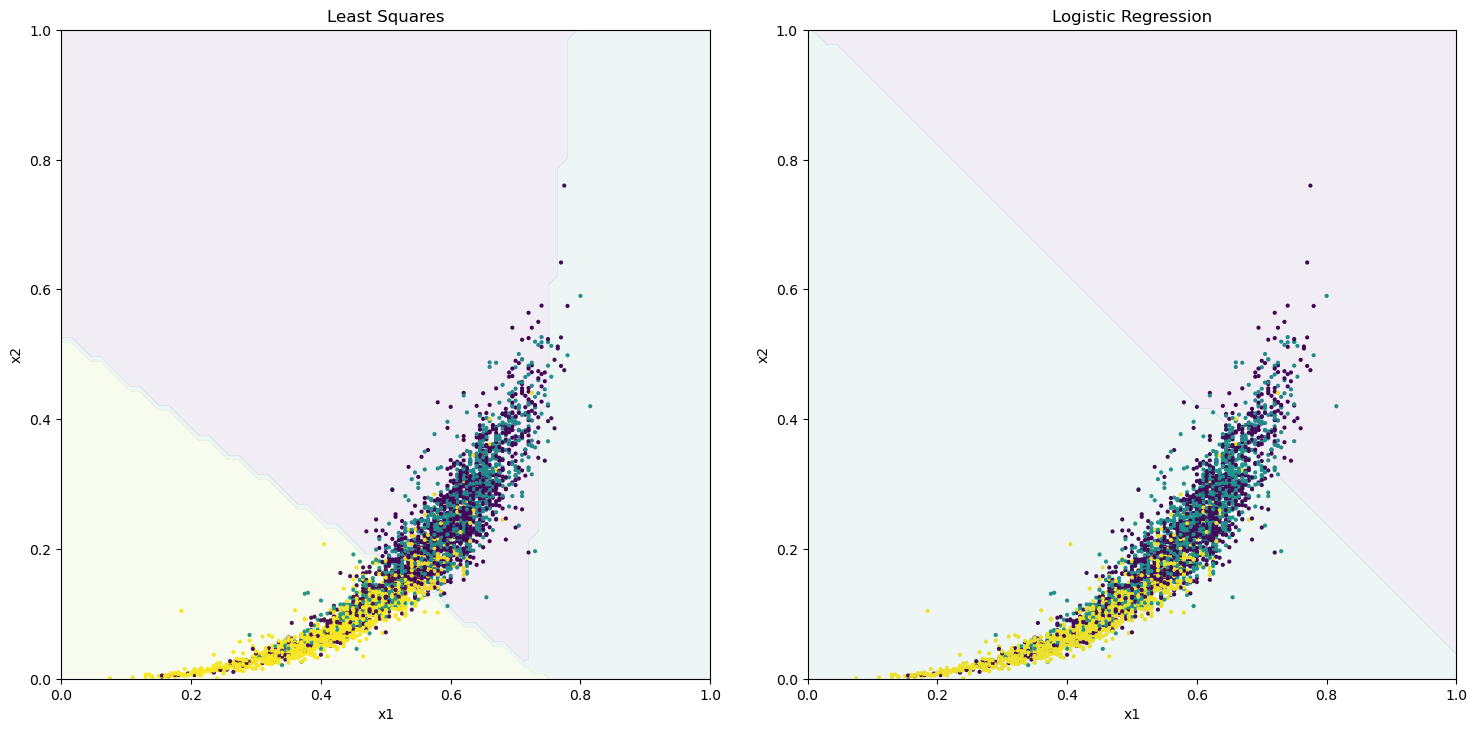

In [80]:
#Least Squares Classifier
model_lsc = LeastSquaresClassifier()
model_lsc.fit(X_train, y)
y_pred_lsc = model_lsc.classify(X_test)

#Logistic Regression
model_log_reg = BayesianLogisticRegression(alpha=1.)
model_log_reg.fit(X_train, y, max_iter=1000)
y_pred_log_reg = model_log_reg.classify(X_test)

plt.figure(figsize=(18, 9))

#Plot of Least Squares Classifier
plt.subplot(1, 2, 1)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=4, cmap='viridis')
# plt.contourf(x1_test, x2_test, y_pred_lsc.reshape(100, 100), alpha=0.08,  colors=['green','brown','black'])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.gca().set_aspect('equal', adjustable='box')
# plt.title("Least Squares")
# plt.xlabel('x1')
# plt.ylabel('x2')
plt.scatter(X[:, 0], X[:, 1], c=y, s= 4)
plt.contourf(x1_test, x2_test, y_pred_lsc.reshape(100, 100), alpha=0.08, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")
plt.xlabel('x1')
plt.ylabel('x2')

#Plot of Logistic Regression
plt.subplot(1, 2, 2)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=4, cmap='viridis')
# plt.contourf(x1_test, x2_test, y_pred_log_reg.reshape(100, 100), alpha=0.08,  colors=['green','brown','black'])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.gca().set_aspect('equal', adjustable='box')
# plt.title("Logistic Regression")
# plt.xlabel('x1')
# plt.ylabel('x2')
plt.scatter(X[:, 0], X[:, 1], c=y, s=4)
plt.contourf(x1_test, x2_test, y_pred_log_reg.reshape(100, 100), alpha=0.08, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.xlabel('x1')
plt.ylabel('x2')


plt.subplots_adjust(wspace=0.15)
plt.show()

# 2b. Observations

#### Here we see poor classsification for both the models. The reason are as follows:
#### 1) Feature Selection: Selecting the right features is crucial for classification. If the two features selected are not informative enough to distinguish between the classes, the models will struggle to make accurate predictions.
#### 2) Dimensionality Reduction: Reducing the number of features from 8 to 2 might have led to the loss of important informations. 
#### 3) Data Distribution: The distribution of data points in a two-dimensional space may not be suitable for linear models like least squares and logistic regression. If the data is not linearly separable, these models will have difficulty making accurate predictions. 

## Section 3: Neural Networks

In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from prml import nn

np.random.seed(1234)

## 3a. Use `abalone.csv`
* Consider `class` as the target variable and implement NN Classification without Regularization
* Calculate accuracy metrics (accuracy, precision, recall, F1 score, confusion matrix)

In [82]:
df = pd.read_csv("abalone.csv")
# sampled_df = df.sample(n=500)

In [83]:
class ClassificationNetwork(nn.Network):
    
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()
        with self.set_parameter():
            self.w1 = nn.random.truncnormal(-2, 2, 1, (n_input, n_hidden))
            self.b1 = nn.zeros(n_hidden)
            #self.w3 = nn.random.truncnormal(-2, 2, 1, (n_hidden, n_hidden))
            #self.b3 = nn.zeros(n_hidden)
            self.w2 = nn.random.truncnormal(-2, 2, 1, (n_hidden, n_output))
            self.b2 = nn.zeros(n_output)

    def __call__(self, x):
        h = nn.tanh(x @ self.w1 + self.b1)
        #h = nn.tanh(h @ self.w3 + self.b3)
        return h @ self.w2 + self.b2

In [84]:
y = df['class'].values
X = df.drop('class', axis=1).values

In [20]:
# X = df[['shucked_weight','whole_weight']].values
# y = df['class'].values
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_bin =  LabelBinarizer()
label_bin.fit(y)

x_train, x_test, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = label_bin.transform(train_labels)
y_test =label_bin.transform(test_labels)

In [21]:
model = ClassificationNetwork(8,40, 3)
optimizer = nn.optimizer.Adam(parameter = model.parameter,learning_rate = 1e-4)
history = []
max_acc = 0
while True:
    indices = np.random.permutation(len(x_train))
    for index in range(0, len(x_train), 50):
        model.clear()
        x_batch = x_train[indices[index: index + 50]]
        y_batch = y_train[indices[index: index + 50]]
        logit = model(x_batch)
        log_likelihood = -nn.loss.softmax_cross_entropy(logit, y_batch).mean(0).sum()
        # print(logit.value[42],np.argmax(logit.value, axis=-1)[42],np.argmax(y_batch, axis=-1)[42])
        if optimizer.iter_count % 100 == 0:
            accuracy = accuracy_score(
                np.argmax(y_batch, axis=-1), np.argmax(logit.value, axis=-1)
            )
                
            print("step {:04d}".format(optimizer.iter_count), end=", ")
            print("accuracy {:.2f}".format(accuracy), end=", ")
            print("Log Likelihood {:g}".format(log_likelihood.value[0]))
        optimizer.maximize(log_likelihood)
        history.append(log_likelihood.value)
        if optimizer.iter_count % 1000 ==0:
            optimizer.learning_rate *= 0.9
            accuracy = accuracy_score(
                np.argmax(y_batch, axis=-1), np.argmax(logit.value, axis=-1)
            )

            
            print("step {:04d}".format(optimizer.iter_count), end=", ")
            print("accuracy {:.2f}".format(accuracy), end=", ")
            print("Log Likelihood {:g}".format(log_likelihood.value[0]))
            break
    else:
        continue
    break

step 0000, accuracy 0.32, Log Likelihood -2.46781
step 0100, accuracy 0.42, Log Likelihood -1.69317
step 0200, accuracy 0.32, Log Likelihood -1.49551
step 0300, accuracy 0.28, Log Likelihood -1.32097
step 0400, accuracy 0.32, Log Likelihood -1.15992
step 0500, accuracy 0.36, Log Likelihood -1.10866
step 0600, accuracy 0.28, Log Likelihood -1.12546
step 0700, accuracy 0.26, Log Likelihood -1.08724
step 0800, accuracy 0.36, Log Likelihood -1.06867
step 0900, accuracy 0.50, Log Likelihood -1.05933
step 1000, accuracy 0.46, Log Likelihood -1.02719


In [22]:
# Accuracy, precision, recall, F1 score and Confusion Matrix
predictions = np.argmax(model(x_test).value, axis=-1)
accuracy = accuracy = accuracy_score(np.argmax(y_test, axis=-1), predictions)
precision = precision_score(np.argmax(y_test, axis=-1), predictions, average='weighted')
recall = recall_score(np.argmax(y_test, axis=-1), predictions, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=-1), predictions, average='weighted')
confusion = confusion_matrix(np.argmax(y_test, axis=-1), predictions)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.45454545454545453
Precision: 0.5562469624155397
Recall: 0.45454545454545453
F1 Score: 0.4501098800576777
Confusion Matrix:
 [[203  96   8]
 [164  91   7]
 [173   8  86]]


# 3a. Observations

#### Using only 2 input features: Output = 38%
#### Using 8 input features: Output = 45%
#### limitations: increasing hidden layers always doesn't help
#### another approach: changing optimizer/ regularization

## 3b. Use `abalone.csv`
* Consider `class` as the target variable and implement NN Classification with Regularization
* Calculate accuracy metrics (accuracy, precision, recall, F1 score, confusion matrix)

In [24]:
class RegularizedRegressionNetwork(nn.Network):
    def __init__(self, n_input, n_hidden, n_output,lambda_val=0.01):
        super().__init__()
        with self.set_parameter():
            self.w1 = nn.random.truncnormal(-2, 2, 1, (n_input, n_hidden))
            self.b1 = nn.zeros(n_hidden)
            self.w2 = nn.random.truncnormal(-2, 2, 1, (n_hidden, n_output))
            self.b2 = nn.zeros(n_output)
            
        self.prior = nn.Gaussian(0, 1)
        self.lambda_value =lambda_val

    def __call__(self, x):
        h = nn.tanh(x @ self.w1 + self.b1)
        
        return h @ self.w2 + self.b2
    
    def log_prior(self):
        logp = 0
        for param in self.parameter.values():
            print(param)
            logp += self.prior.log_pdf(param)
        # print(logp.shape)
        return logp
        
    def regularization_loss(self):
        logp = 0
        for param in self.parameter.values():
            logp += np.sum(np.square(param.value))
        regularization_loss = logp* self.lambda_value
        return regularization_loss

In [41]:
model = RegularizedRegressionNetwork(8, 40, 3,0.01)
optimizer = nn.optimizer.Adam(model.parameter, 0.01)
history = []
max_acc = 0
while True:
    indices = np.random.permutation(len(x_train))
    for index in range(0, len(x_train), 50):
        model.clear()
        x_batch = x_train[indices[index: index + 50]]
        y_batch = y_train[indices[index: index + 50]]
        logit = model(x_batch)
        log_posterior = -nn.square(logit-y_batch).mean(0).sum() + model.regularization_loss()
        if optimizer.iter_count % 100 == 0:
            accuracy = accuracy_score(
                np.argmax(y_batch, axis=-1), np.argmax(logit.value, axis=-1)
            )
                
            print("step {:04d}".format(optimizer.iter_count), end=", ")
            print("accuracy {:.2f}".format(accuracy), end=", ")
            print("Log Likelihood {:g}".format(log_posterior.value[0]))
            optimizer.learning_rate *= 0.9
        optimizer.maximize(log_posterior)
        history.append(log_posterior.value)
        if optimizer.iter_count == 1000:
            accuracy = accuracy_score(
                np.argmax(y_batch, axis=-1), np.argmax(logit.value, axis=-1)
            )
            print("step {:04d}".format(optimizer.iter_count), end=", ")
            print("accuracy {:.2f}".format(accuracy), end=", ")
            print("Log Likelihood {:g}".format(log_posterior.value[0]))
            break
    else:
        continue
    break

step 0000, accuracy 0.34, Log Likelihood -85.7145
step 0100, accuracy 0.38, Log Likelihood 2.58792
step 0200, accuracy 0.46, Log Likelihood 2.66911
step 0300, accuracy 0.52, Log Likelihood 2.75654
step 0400, accuracy 0.60, Log Likelihood 2.82402
step 0500, accuracy 0.40, Log Likelihood 2.68718
step 0600, accuracy 0.58, Log Likelihood 2.83602
step 0700, accuracy 0.56, Log Likelihood 2.87139
step 0800, accuracy 0.54, Log Likelihood 2.83698
step 0900, accuracy 0.46, Log Likelihood 2.81981
step 1000, accuracy 0.52, Log Likelihood 2.85858


In [42]:
# Accuracy, precision, recall, F1 score and Confusion Matrix
predictions = np.argmax(model(x_test).value, axis=-1)
accuracy = accuracy = accuracy_score(np.argmax(y_test, axis=-1), predictions)
precision = precision_score(np.argmax(y_test, axis=-1), predictions, average='weighted')
recall = recall_score(np.argmax(y_test, axis=-1), predictions, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=-1), predictions, average='weighted')
confusion = confusion_matrix(np.argmax(y_test, axis=-1), predictions)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.5717703349282297
Precision: 0.5860280777401643
Recall: 0.5717703349282297
F1 Score: 0.5016020500361121
Confusion Matrix:
 [[243  13  51]
 [214  17  31]
 [ 49   0 218]]


# 3b. Observations

#### The prml library code is implemented considering univariant gaussian distribution i.e, for variable with dimension 1. However, our abalone dataset consists 8 features.
#### "regularization_loss" method has been added. The method calculates a regularization loss by summing the squares of parameter values, scaling this sum by a hyperparameter lambda_value, and returning the result. The regularization loss is used in training to penalize large parameter values and improve the model's generalization.
                            

#### Without regularization an accuracy of 45% and precision of 55% was obtained.
#### After regularization an accuracy of 57% was precision of 58% was obtained.

## Section 4: Convolution Neural Network Using `cnn_data.zip`
* Download the `cnn_data.zip` from UBLearns and extract the contents. It contains `train` and `test` folders.
* The images in this dataset are 240X240 pixels RGB (3 channels).
* Implement CNN on this dataset 
* Calculate accuracy metrics (accuracy, precision, recall, F1 score, confusion matrix)
* Write your observations

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from PIL import Image
import os

from prml import nn

np.random.seed(1234)

# Function to load the images from train and test folders
def load_images_from_folder(folder_path):
    images = []
    labels = []
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img = Image.open(os.path.join(class_path, filename))
                img = img.resize((64, 64))
                if img is not None:
                    images.append(np.array(img))
                    labels.append(class_name)
    return np.array(images), np.array(labels)

train_dir = 'cnn_data/train'
test_dir = 'cnn_data/test'
train_images, train_labels = load_images_from_folder(train_dir)
test_images, test_labels = load_images_from_folder(test_dir)
train_images = train_images / 255.0
test_images = test_images / 255.0
label_binarizer = LabelBinarizer()
train_labels_one_hot = label_binarizer.fit_transform(train_labels)
test_labels_one_hot = label_binarizer.transform(test_labels)

In [65]:
class ConvolutionalNeuralNetwork(nn.Network):
    
    def __init__(self):
        super().__init__()
        with self.set_parameter():
            self.conv1 = nn.image.Convolve2d(
                nn.random.truncnormal(-2, 2, 1, (5, 5, 3, 20)),
                stride=(1, 1), pad=(0, 0))
            self.b1 = nn.array([0.1] * 20)
            self.conv2 = nn.image.Convolve2d(
                nn.random.truncnormal(-2, 2, 1, (5, 5, 20, 20)),
                stride=(1, 1), pad=(0, 0))
            self.b2 = nn.array([0.1] * 20)
            self.w3 = nn.random.truncnormal(-2, 2, 1, (13 * 13 * 20, 100))
            self.b3 = nn.array([0.1] * 100)
            self.w4 = nn.random.truncnormal(-2, 2, 1, (100, 3))
            self.b4 = nn.array([0.1] * 3)
        
    def __call__(self, x):
        h = nn.relu(self.conv1(x) + self.b1)
        h = nn.max_pooling2d(h, (2, 2), (2, 2))
        h = nn.relu(self.conv2(h) + self.b2)
        h = nn.max_pooling2d(h, (2, 2), (2, 2))
        h = h.reshape(-1, 13 * 13 * 20)
        h = nn.relu(h @ self.w3 + self.b3)
        return h @ self.w4 + self.b4


model =ConvolutionalNeuralNetwork()
optimizer = nn.optimizer.Adam(model.parameter, 1e-3)
x_train = train_images
y_train = train_labels_one_hot
x_test = test_images
label_test = test_labels_one_hot

while True:
    indices = np.random.permutation(len(x_train))
    for index in range(0, len(x_train), 50):
        model.clear()
        x_batch = x_train[indices[index: index + 50]]
        y_batch = y_train[indices[index: index + 50]]
        logit = model(x_batch)
        log_likelihood = -nn.loss.softmax_cross_entropy(logit, y_batch).mean(0).sum()
        if optimizer.iter_count % 10 == 0:
            accuracy = accuracy_score(
                np.argmax(y_batch, axis=-1), np.argmax(logit.value, axis=-1)
            )
            print("step {:04d}".format(optimizer.iter_count), end=", ")
            print("accuracy {:.2f}".format(accuracy), end=", ")
            print("Log Likelihood {:g}".format(log_likelihood.value[0]))
        optimizer.maximize(log_likelihood)
        if optimizer.iter_count == 500:
            print("step {:04d}".format(optimizer.iter_count), end=", ")
            print("accuracy {:.2f}".format(accuracy), end=", ")
            print("Log Likelihood {:g}".format(log_likelihood.value[0]))
            break
    else:
        continue
    break

step 0000, accuracy 0.38, Log Likelihood -7830.64
step 0010, accuracy 0.26, Log Likelihood -4526.97
step 0020, accuracy 0.32, Log Likelihood -4445.76
step 0030, accuracy 0.38, Log Likelihood -3191.59
step 0040, accuracy 0.42, Log Likelihood -3046.31
step 0050, accuracy 0.42, Log Likelihood -2536.73
step 0060, accuracy 0.54, Log Likelihood -1518.92
step 0070, accuracy 0.42, Log Likelihood -2161.08
step 0080, accuracy 0.32, Log Likelihood -2986.08
step 0090, accuracy 0.32, Log Likelihood -2220.51
step 0100, accuracy 0.60, Log Likelihood -1655.88
step 0110, accuracy 0.44, Log Likelihood -1937.46
step 0120, accuracy 0.50, Log Likelihood -1941.19
step 0130, accuracy 0.36, Log Likelihood -1601.43
step 0140, accuracy 0.50, Log Likelihood -1374.63
step 0150, accuracy 0.40, Log Likelihood -1749.24
step 0160, accuracy 0.44, Log Likelihood -1405.1
step 0170, accuracy 0.52, Log Likelihood -1019.21
step 0180, accuracy 0.48, Log Likelihood -1667.36
step 0190, accuracy 0.54, Log Likelihood -1349.25
s

In [68]:
predictions =label_binarizer.inverse_transform(model(x_test).value)
accuracy = accuracy_score(predictions,test_labels)
precision = precision_score(test_labels, predictions, average='weighted')
recall = recall_score(test_labels, predictions, average='weighted')
f1 = f1_score(test_labels, predictions, average='weighted')
confusion = confusion_matrix(test_labels, predictions)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.4298245614035088
Precision: 0.4314762532153837
Recall: 0.4298245614035088
F1 Score: 0.42836777131587095
Confusion Matrix:
 [[14 11 13]
 [ 8 16 14]
 [11  8 19]]


In [69]:
predictions =label_binarizer.inverse_transform(model(x_train).value)
accuracy = accuracy_score(predictions,train_labels)
precision = precision_score(train_labels, predictions, average='weighted')
recall = recall_score(train_labels, predictions, average='weighted')
f1 = f1_score(train_labels, predictions, average='weighted')
confusion = confusion_matrix(train_labels, predictions)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.7848101265822784
Precision: 0.7851278980857138
Recall: 0.7848101265822784
F1 Score: 0.7844704270759817
Confusion Matrix:
 [[183  25  29]
 [ 31 178  28]
 [ 16  24 197]]


# 4. Observations

#### mnist data had padding of 2-size on all sides; our images don't have padding(on random check);
#### but still truncation is done on all sides
#### Input: 64 X 64 X 3
#### after truncation: 60 X 60 X 3
#### after max pooling layer : 13 X 13
#### On 1000 iterations, achieved 94% train accuracy but only 43% test accuracy- overfit
#### On 500 iterations, achieved 77% train accuracy, 48% test accuracy
### Recommendation: Use of more layers or a more complex architecture like VGG16


## Section 5: (Bonus) Multi-class Classification using sklearn

## 5a. Use `bonus.csv`
   * Consider `quality` column as target variable
   * Split the dataset into train and test sets (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
   * Train the model using Logistic Regression (with and without Regularization)
   (https://scikit-learn.org/stable/modules/linear_model.html)
   * Test the model on test set
   * Calculate accuracy, precision, recall, F-1 score, confusion matrix for both models (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
   * Write your observations

In [95]:
df2 = pd.read_csv("bonus.csv")
y = df2['quality']
X = df2.drop('quality', axis=1)
y.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [84]:
df2['quality'].value_counts()
len(y)

4898

In [85]:
2198/4177

0.526214986832655

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression without regularization 
lr_no_reg = LogisticRegression()
lr_no_reg.fit(X_train, y_train)

# Train Logistic Regression with L1 regularization
lr_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
lr_l1.fit(X_train, y_train)

# Train Logistic Regression with L2 regularization (default)
lr_l2 = LogisticRegression(penalty='l2',solver='saga', max_iter=1000)
lr_l2.fit(X_train, y_train)

# Testing the models on the test set
y_pred_no_reg = lr_no_reg.predict(X_test)
y_pred_l1 = lr_l1.predict(X_test)
y_pred_l2 = lr_l2.predict(X_test)

# accuracy, precision, recall, and F1 score for each model
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_true, y_pred)
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(cm)
    print("____________________________________________")

calculate_metrics(y_test, y_pred_no_reg, "Logistic Regression (No Regularization)")
calculate_metrics(y_test, y_pred_l1, "Logistic Regression (L1 Regularization)")
calculate_metrics(y_test, y_pred_l2, "Logistic Regression (L2 Regularization)")


/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Metrics for Logistic Regression (No Regularization):
Accuracy: 0.5306122448979592
Precision: 0.3055270553912166
Recall: 0.22055057819233076
F1 Score: 0.22304776152308986
Confusion Matrix:
[[  0   0   2   2   0   1   0]
 [  0   1  12  12   0   0   0]
 [  0   1 151 137   1   1   0]
 [  0   0  80 322  29   0   1]
 [  0   0  13 133  46   0   0]
 [  0   0   2  25   8   0   0]
 [  0   0   0   0   0   0   0]]
____________________________________________
Metrics for Logistic Regression (L1 Regularization):
Accuracy: 0.5326530612244897
Precision: 0.30621602880888277
Recall: 0.22153241422571318
F1 Score: 0.2239610497864252
Confusion Matrix:
[[  0   0   2   2   0   1   0]
 [  0   1  12  12   0   0   0]
 [  0   1 153 135   1   1   0]
 [  0   0  80 322  29   0   1]
 [  0   0  13 133  46   0   0]
 [  0   0   2  25   8   0   0]
 [  0   0   0   0   0   0   0]]
____________________________________________
Metrics for Logistic Regression (L2 Regularization):
Accuracy: 0.5316326530612245
Precision: 0.306

/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_cl

# 5. Observations

In [85]:
df2['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

### The accuracy and precision obtained for all three models are 53% and 30% respectively; which is poor.
### Since it is a class imbalance problem and precision metric achieved until now is poor, so we can adopt oversampling technique

In [49]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression

df2 = pd.read_csv("bonus.csv")
y = df2['quality']
X = df2.drop('quality', axis=1)
y.unique()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rus = RandomUnderSampler(random_state=42)
# X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


# Apply SMOTE to oversample the minority class
# sm = SMOTE(sampling_strategy='auto', random_state=42)
sm = SMOTE(sampling_strategy='auto', k_neighbors=4, random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# scaler = StandardScaler()
# X_train_resampled = scaler.fit_transform(X_train_resampled)
# X_test = scaler.transform(X_test)

# Train Logistic Regression without regularization 
lr_no_reg = LogisticRegression()
lr_no_reg.fit(X_train_resampled, y_train_resampled)

# Train Logistic Regression with L1 regularization
lr_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
lr_l1.fit(X_train_resampled, y_train_resampled)

# Train Logistic Regression with L2 regularization (default)
lr_l2 = LogisticRegression(penalty='l2',solver='saga', max_iter=1000)
lr_l2.fit(X_train_resampled, y_train_resampled)

# Testing the models on the test set
y_pred_no_reg = lr_no_reg.predict(X_test)
y_pred_l1 = lr_l1.predict(X_test)
y_pred_l2 = lr_l2.predict(X_test)

# accuracy, precision, recall, and F1 score for each model
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_true, y_pred)
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(cm)
    print("____________________________________________")

calculate_metrics(y_test, y_pred_no_reg, "Logistic Regression (No Regularization)")
calculate_metrics(y_test, y_pred_l1, "Logistic Regression (L1 Regularization)")
calculate_metrics(y_test, y_pred_l2, "Logistic Regression (L2 Regularization)")


/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Metrics for Logistic Regression (No Regularization):
Accuracy: 0.2
Precision: 0.22134991765566836
Recall: 0.201748077237768
F1 Score: 0.14202528598195494
Confusion Matrix:
[[  0   0   2   1   0   2   0]
 [  2  11   7   1   0   1   3]
 [ 46  58 116  21   7  18  25]
 [ 66  53  83  39  19  91  81]
 [ 11  12  20  12  16  65  56]
 [  0   4   2   1   1  14  13]
 [  0   0   0   0   0   0   0]]
____________________________________________
Metrics for Logistic Regression (L1 Regularization):
Accuracy: 0.2316326530612245
Precision: 0.21194264374265154
Recall: 0.23597386835604803
F1 Score: 0.1596496552209218
Confusion Matrix:
[[  0   0   3   0   0   2   0]
 [  0  15   6   0   2   0   2]
 [ 40  60 134  24  10  11  12]
 [ 50  48 111  41  31  96  55]
 [ 11   9  22  17  24  68  41]
 [  3   1   2   3   4  13   9]
 [  0   0   0   0   0   0   0]]
____________________________________________
Metrics for Logistic Regression (L2 Regularization):
Accuracy: 0.2316326530612245
Precision: 0.2117110097902721
Re

/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_d

### The classification metrics got worse, maybe other models are required.